In [ ]:
!pip3 install geopandas
!pip3 install descartes
!pip3 install mplleaflet

In [20]:
import numpy as np
import pandas as pd
import geopandas as gpd

def load_data():
    """Loads the CSV files and appends them into a single DataFrame"""
    column_types = {'Num_Acc': np.string_, 'jour': np.string_}
    fr2018 = pd.read_csv("data/caracteristiques-2018.csv", dtype=column_types)
#   return uk2014.append(uk2015)
    return fr2018

In [21]:
from shapely.geometry import Point
from functools import partial
from shapely.ops import transform
import pyproj

def buffer_in_meters(lng, lat, radius):
    proj_meters = pyproj.Proj(init='epsg:3857')
    proj_latlng = pyproj.Proj(init='epsg:4326')
    
    project_to_meters = partial(pyproj.transform, proj_latlng, proj_meters)
    project_to_latlng = partial(pyproj.transform, proj_meters, proj_latlng)
    
    pt_latlng = Point(lng, lat)
    pt_meters = transform(project_to_meters, pt_latlng)
    
    buffer_meters = pt_meters.buffer(radius)
    buffer_latlng = transform(project_to_latlng, buffer_meters)
    return buffer_latlng
print("done")

done


In [22]:
fr_acc = load_data()
print("Data loaded")
print(fr_acc.head())

Data loaded
        Num_Acc  an  mois jour  hrmn  lum  agg  int  atm  col  com  \
0  201800000001  18     1   24  1505    1    1    4  1.0  1.0    5   
1  201800000002  18     2   12  1015    1    2    7  7.0  7.0   11   
2  201800000003  18     3    4  1135    1    2    3  1.0  7.0  477   
3  201800000004  18     5    5  1735    1    2    1  7.0  3.0   52   
4  201800000005  18     6   26  1605    1    2    1  1.0  3.0  477   

                        adr gps        lat      long  dep  
0    route des Ansereuilles   M  5055737.0  294992.0  590  
1  Place du g�n�ral de Gaul   M  5052936.0  293151.0  590  
2            Rue  nationale   M  5051243.0  291714.0  590  
3       30 rue Jules Guesde   M  5051974.0  289123.0  590  
4        72 rue Victor Hugo   M  5051607.0  290605.0  590  


In [23]:
def concave_hull(points, k):
    pass

In [24]:
fr_acc.lat = fr_acc.lat/100000
fr_acc.long = fr_acc.long/100000
print(fr_acc.head())

        Num_Acc  an  mois jour  hrmn  lum  agg  int  atm  col  com  \
0  201800000001  18     1   24  1505    1    1    4  1.0  1.0    5   
1  201800000002  18     2   12  1015    1    2    7  7.0  7.0   11   
2  201800000003  18     3    4  1135    1    2    3  1.0  7.0  477   
3  201800000004  18     5    5  1735    1    2    1  7.0  3.0   52   
4  201800000005  18     6   26  1605    1    2    1  1.0  3.0  477   

                        adr gps       lat     long  dep  
0    route des Ansereuilles   M  50.55737  2.94992  590  
1  Place du g�n�ral de Gaul   M  50.52936  2.93151  590  
2            Rue  nationale   M  50.51243  2.91714  590  
3       30 rue Jules Guesde   M  50.51974  2.89123  590  
4        72 rue Victor Hugo   M  50.51607  2.90605  590  


In [27]:
# Drop invalid rows

fr_acc.dropna()

fr_acc = fr_acc.loc[fr_acc.lat <=  90.0]
fr_acc = fr_acc.loc[fr_acc.lat >= -90.0]

fr_acc = fr_acc.loc[fr_acc.long <=  180.0]
fr_acc = fr_acc.loc[fr_acc.long >= -180.0]
print("invalid rows dropped")
print(fr_acc.head())

invalid rows dropped
        Num_Acc  an  mois jour  hrmn  lum  agg  int  atm  col  com  \
0  201800000001  18     1   24  1505    1    1    4  1.0  1.0    5   
1  201800000002  18     2   12  1015    1    2    7  7.0  7.0   11   
2  201800000003  18     3    4  1135    1    2    3  1.0  7.0  477   
3  201800000004  18     5    5  1735    1    2    1  7.0  3.0   52   
4  201800000005  18     6   26  1605    1    2    1  1.0  3.0  477   

                        adr gps       lat     long  dep  
0    route des Ansereuilles   M  50.55737  2.94992  590  
1  Place du g�n�ral de Gaul   M  50.52936  2.93151  590  
2            Rue  nationale   M  50.51243  2.91714  590  
3       30 rue Jules Guesde   M  50.51974  2.89123  590  
4        72 rue Victor Hugo   M  50.51607  2.90605  590  


In [36]:
# Create the radian longitude and latitude columns
import math

fr_acc['rad_lng'] = fr_acc['long'] * math.pi / 180.0
fr_acc['rad_lat'] = fr_acc['lat'] * math.pi / 180.0
print(fr_acc.head())

        Num_Acc  an  mois jour  hrmn  lum  agg  int  atm  col  com  \
0  201800000001  18     1   24  1505    1    1    4  1.0  1.0    5   
1  201800000002  18     2   12  1015    1    2    7  7.0  7.0   11   
2  201800000003  18     3    4  1135    1    2    3  1.0  7.0  477   
3  201800000004  18     5    5  1735    1    2    1  7.0  3.0   52   
4  201800000005  18     6   26  1605    1    2    1  1.0  3.0  477   

                        adr gps       lat     long  dep   rad_lng   rad_lat  \
0    route des Ansereuilles   M  50.55737  2.94992  590  0.051486  0.882393   
1  Place du g�n�ral de Gaul   M  50.52936  2.93151  590  0.051165  0.881904   
2            Rue  nationale   M  50.51243  2.91714  590  0.050914  0.881608   
3       30 rue Jules Guesde   M  50.51974  2.89123  590  0.050461  0.881736   
4        72 rue Victor Hugo   M  50.51607  2.90605  590  0.050720  0.881672   

   cluster  
0       -1  
1       -1  
2       -1  
3       -1  
4       -1  


In [43]:
# Parameters
eps_in_meters = 100.0
num_samples = 10

In [44]:
# Cluster the data
import time
from sklearn.cluster import DBSCAN
#t_new = time.perf_counter()
start_time = time.clock()
earth_perimeter = 40070000.0  # In meters
eps_in_radians = eps_in_meters / earth_perimeter * (2 * math.pi)

fr_acc['cluster'] = DBSCAN(eps=eps_in_radians, min_samples=num_samples, metric='haversine').fit_predict(fr_acc[['rad_lat', 'rad_lng']])

elapsed_time = time.clock() - start_time
print(elapsed_time, "seconds")

(9.239999999999995, 'seconds')


In [45]:
# Group the observations by cluster identifier
groups = fr_acc.groupby('cluster')
print("grouping finished")

grouping finished


In [46]:
# Create the list of cluster blobs
from shapely.ops import cascaded_union

clusters = list()
blobs = list()
counts = list()
start_time = time.time()
for cluster_id, points in groups:
#    print(cluster_id)
    if cluster_id >= 0:
        buffer_radius = eps_in_meters * 0.6
        buffers = [buffer_in_meters(lon, lat, buffer_radius) for lon, lat in zip(points['long'], points['lat'])]
        blob = cascaded_union(buffers)
        blobs.append(blob)
        clusters.append(cluster_id)
        counts.append(len(points))
elapsed_time = time.time() - start_time
print(elapsed_time, "seconds")
print("List of cluster blobs created")

(1.4126520156860352, 'seconds')
List of cluster blobs created


(0.3999999999999915, 'seconds')


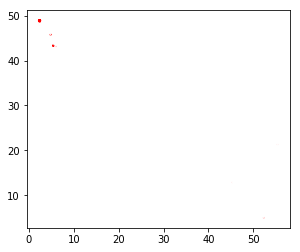

In [47]:
# Create the GeoDataFrame from the cluster numbers and blobs
start_time = time.clock()
data = { 'cluster': clusters, 'polygon': blobs, 'count': counts }

cluster_gdf = gpd.GeoDataFrame(pd.DataFrame(data), geometry='polygon')
cluster_gdf.crs = {'init': 'epsg:4326'}

ax = cluster_gdf.geometry.plot(linewidth=2.0, color='red', edgecolor='red')
elapsed_time = time.clock() - start_time
print(elapsed_time, "seconds")

In [48]:
import mplleaflet
mplleaflet.show(fig=ax.figure, tiles='cartodb_positron')